# Euler Maruyuma Integrator

The langevin equation is given by 

$$ \boxed{\frac{d\hat{x}}{dt} = -\lambda \hat{x} + \sqrt{2D}\hat{\xi}(t)} $$

The Euler-Maruyuma Integrator is given by 

$$ \boxed{x(t+dt) = x(t) -\lambda x(t)dt + \sqrt{2Ddt}\hat{N}(t)} $$ \
where $\hat{N}(t) \sim Normal(0,1)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numba import jit

In [3]:
LAMBDA =  1 
D = 30
x_0 = 0
t_0 = 0

In [4]:
@jit
def process_sim(num,t_end):
    y = np.zeros(num)
    y[0] = x_0
    DT = (t_end-t_0)/num
    t = np.arange(t_0, t_end ,DT)
    for i in range(0,num-1):
        y[i+1] = y[i] - LAMBDA * y[i] * DT + np.sqrt(2 * D * DT) * np.random.normal(0,1)
    return t, y    

In [5]:
N = 1000000
n = 1000
t_e = 7
n_stamp = 500
p_t_stamp = np.zeros(N)
# fig,axes = plt.subplots(1,1,figsize=(16,9))
for i in range(0,N):
    # axes.plot(*process_sim(n,t_e))
    ts,ys = process_sim(n,t_e)
    t_stamp = ts[n_stamp]
    p_t_stamp[i]=ys[n_stamp]
    

In [7]:
N1 = 1
n1 = 10000000
t_end = n1
# n_stamp = 500
# p_t_stamp = np.zeros(N)
posn = np.zeros(n1)
time = np.zeros(n1)
# fig,axes = plt.subplots(1,1,figsize=(16,9))
time, posn = process_sim(n1,t_e)
MSD = 0
for i in range(0,n1-1):
    MSD += (posn[i+1] - posn[i])**2
MSD = MSD/(n1-1)
print(MSD)
    

4.1999932589155615e-05


In [5]:
X = np.linspace(-20,20,1000)

# Gaussian Distribution
norm = stats.norm

# fitting the histogram with the gaussian dist
param = norm.fit(p_t_stamp,floc=0) # floc fixes the the average to be 0
pdf_fit = norm.pdf(X,*param)


# the standard deviation from the derived equation
sigma = np.sqrt((D/LAMBDA) * (1 - np.exp((-2) * LAMBDA * t_stamp))) 
pdf_eq = norm.pdf(X,0,sigma)

The Probability Distribution from the Fokker Planck Dist is given by 

$$ \boxed{P(x,t) \sim Normal(0, \frac{D}{\lambda}[1-e^{-2\lambda t}])} $$

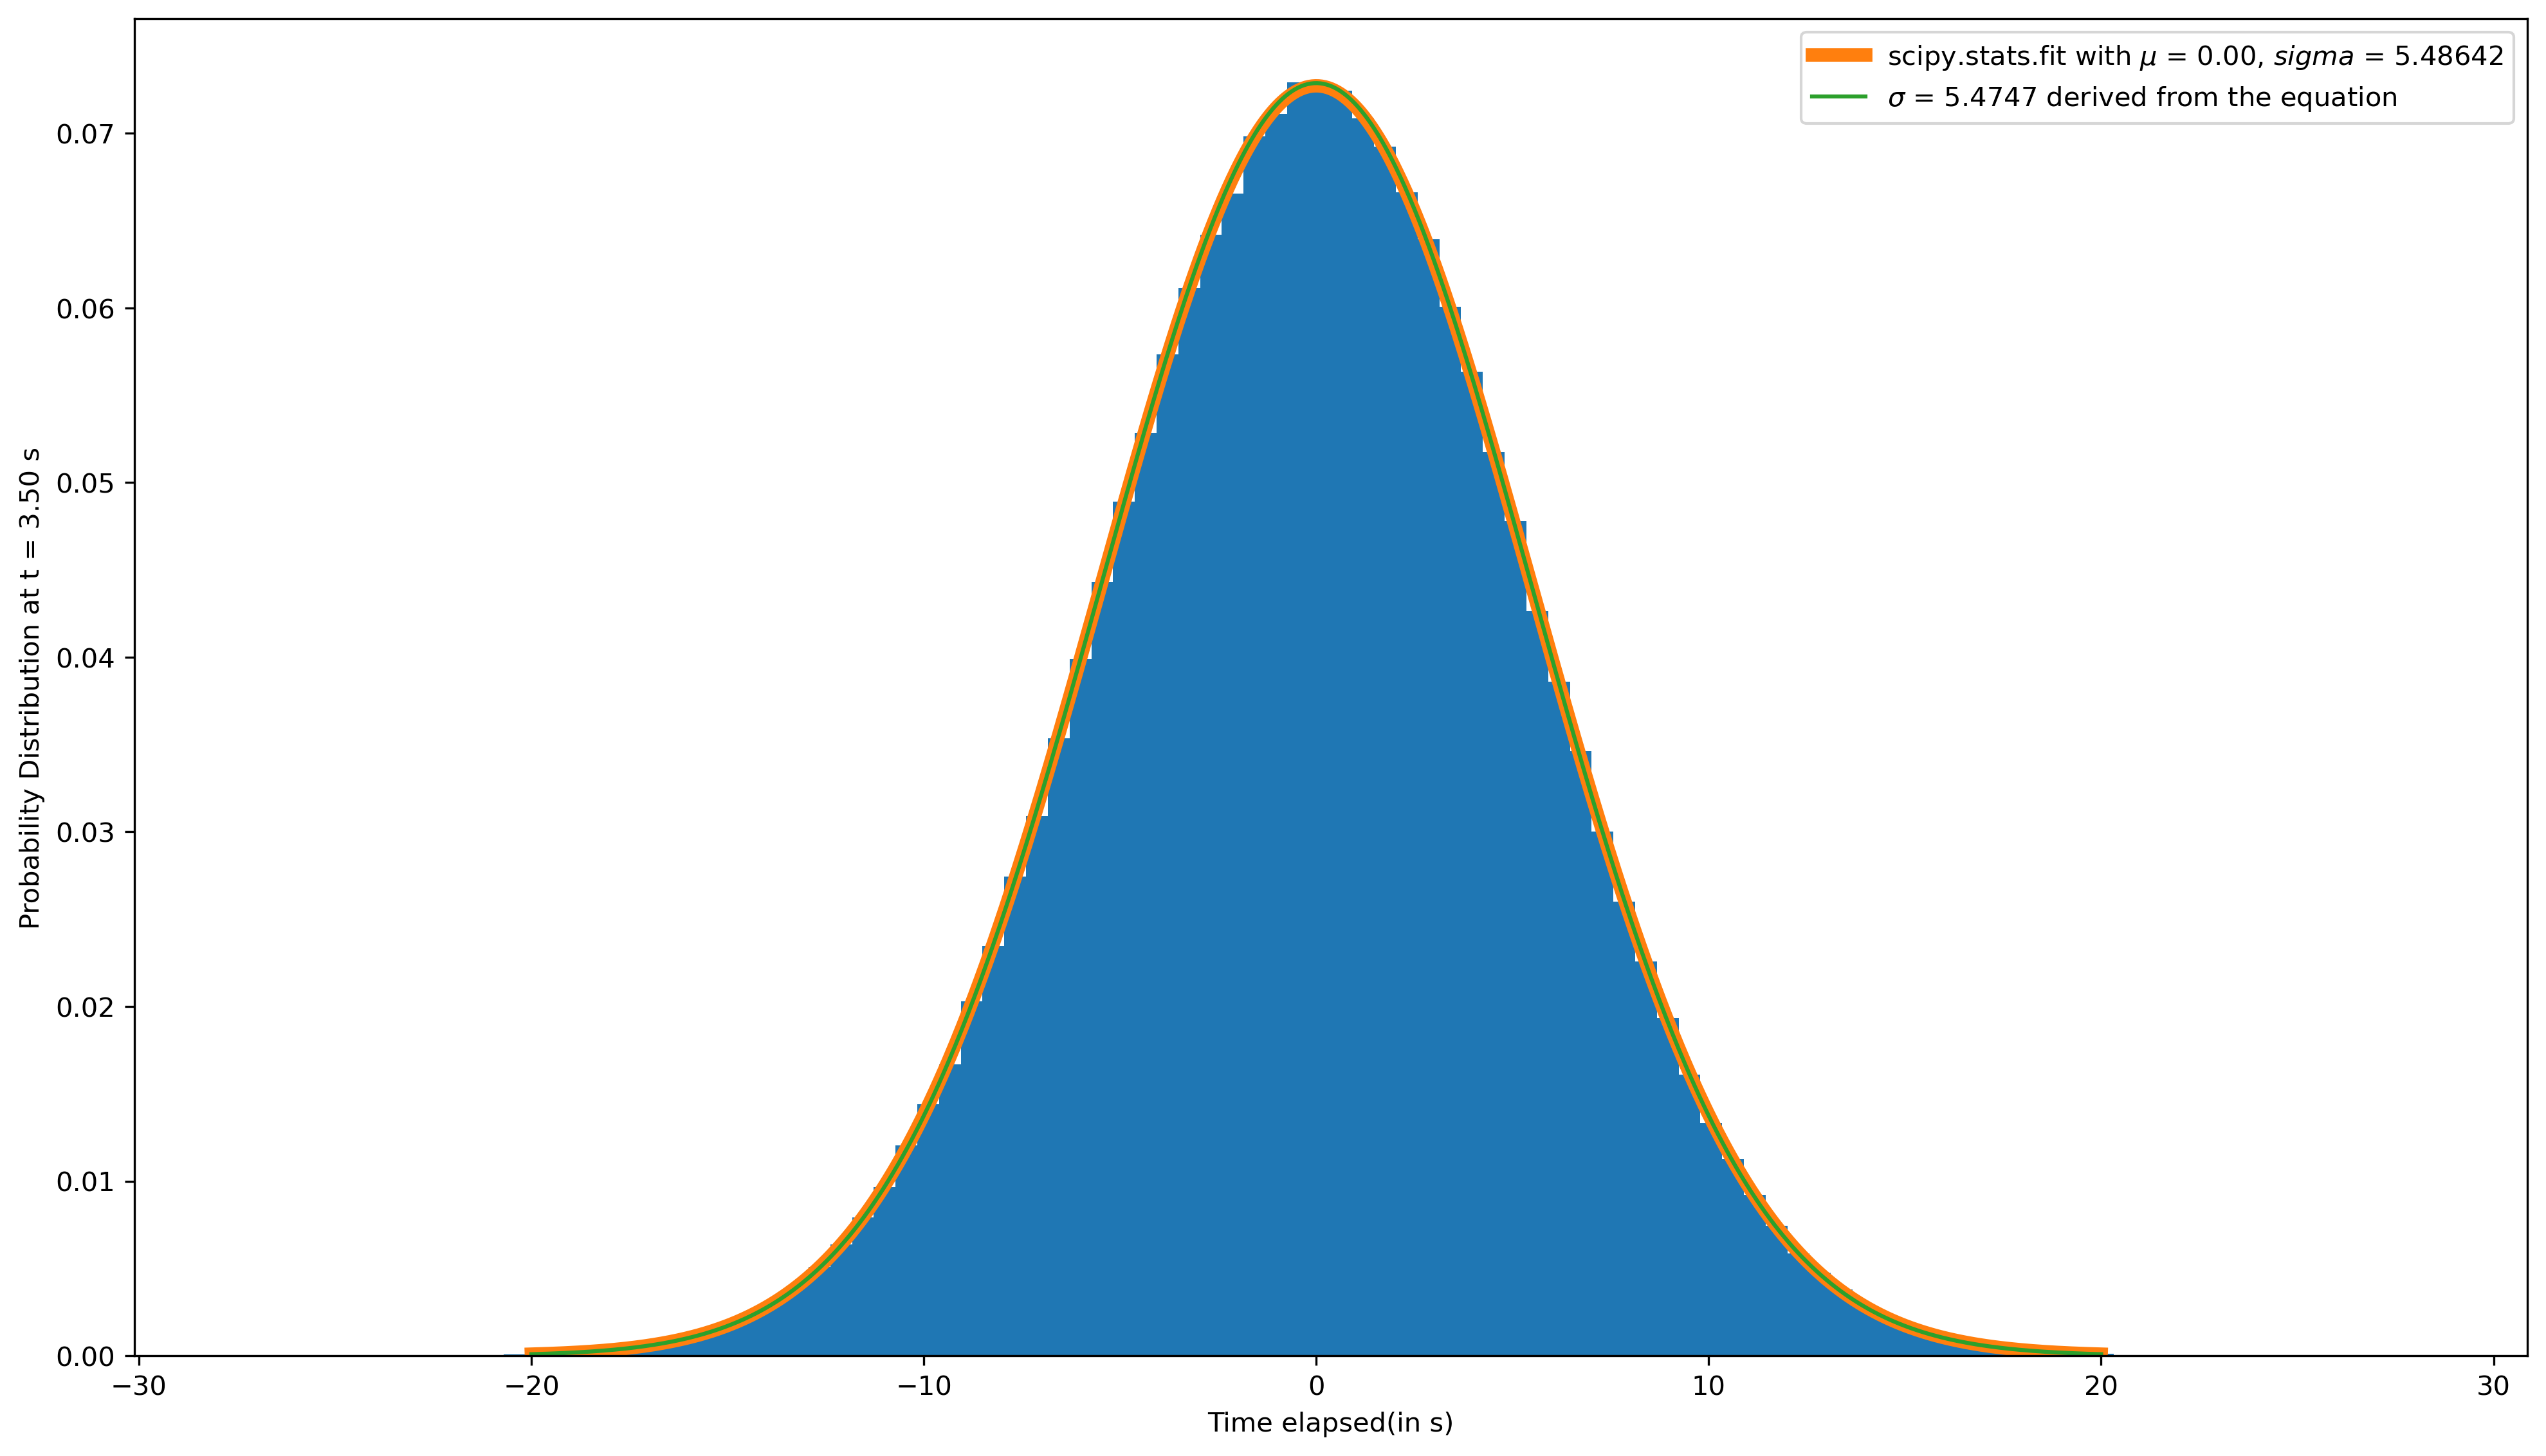

In [15]:
fig,axes = plt.subplots(1,1,figsize=(16,9),dpi=300)
axes.hist(p_t_stamp, bins = 100, density = True);
axes.set_xlabel("Time elapsed(in s)")
axes.set_ylabel("Probability Distribution at t = %.2f s"%t_stamp)
axes.plot(X,pdf_fit,lw=5,label=rf"scipy.stats.fit with $\mu$ = %.2f, $sigma$ = %.5f"%(param[0],param[1]))
axes.plot(X,pdf_eq,label=rf"$\sigma$ = %0.4f derived from the equation "%sigma)
fig.savefig("plot")
axes.legend()

In [8]:
SIGMA_EQ = sigma
SIGMA_FIT = param[1]
ERR = abs(SIGMA_EQ-SIGMA_FIT)
ERR,SIGMA_EQ,SIGMA_FIT

(0.012141030641032557, 5.474727713871564, 5.486868744512597)

## verify some shit
-  No WEB in FBM
-  WEB CTRW
-  WEB levy walks